In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sheets = ['2019','2018','2017','2016','2015','2014']
dat = {}
for s in sheets:
    dat[s] = pd.read_excel('March Madness.xlsx',sheet_name=s)
    dat[s]['Year'] = int(s)
    dat[s] = dat[s].dropna()

In [3]:
dat[s].head()

Team    Conference   Region  Cinderella  \
0  Albany (NY)  America East    South         1.0   
1     American       Patriot     West         1.0   
2      Arizona        Pac-12     West         0.0   
3  Arizona St.        Pac-12  Midwest         1.0   
4       Baylor        Big 12     West         0.0   

   Conference Tournament Champion  Number of Tournament Wins  \
0                             1.0                        0.0   
1                             1.0                        0.0   
2                             0.0                        3.0   
3                             0.0                        0.0   
4                             0.0                        2.0   

   Made Tournament Previous Year  Game Count  Wins  Losses  ...  \
0                            1.0        32.0  18.0    14.0  ...   
1                            0.0        32.0  20.0    12.0  ...   
2                            1.0        34.0  30.0     4.0  ...   
3                            0.0        32.0  21.0    11.0  ...   
4                            0.0        35.0  24.0    11.0  ...   

   ESPN Strength of Schedule  Wins Against Top 25 RPI Teams  \
0                      287.0                            0.0   
1                      234.0                            0.0   
2                        5.0                            4.0   
3                       58.0                            1.0   
4                       10.0                            2.0   

   Losses Against Top 25 RPI Teams  Total Points  Average PPG  \
0                              0.0        2113.0         66.0   
1                              1.0        2046.0         63.9   
2                              1.0        2484.0         73.1   
3                              3.0        2401.0         75.0   
4                              5.0        2632.0         75.2   

   Total Opp Points  Average Opp PPG  Total Scoring Differential  \
0            2043.0             63.8                        70.0   
1            1876.0             58.6                       170.0   
2            1977.0             58.1                       507.0   
3            2204.0             68.9                       197.0   
4            2393.0             68.4                       239.0   

   Scoring Differential Per Game  Year  
0                            2.2  2014  
1                            5.3  2014  
2                           15.0  2014  
3                            6.1  2014  
4                            6.8  2014  

[5 rows x 33 columns]

### Notes ###
- since teams haven't played the same number of games, adjust 'total' variables to % per game or something along those lines

In [4]:
# get all the data into the same dataframe and delete original dictionary of dataframes
df = dat[sheets[0]]
for s in sheets[1:]:
    df = df.append(dat[s])
df = df.reset_index()
df = df.drop(['index'],axis=1)
del(dat)

In [5]:
# Graphing parameters
label_angle = 90
figs = (5,13)

In [6]:
# this is the function that should be used to get the results for a given algorithm/sorting of the data
def getScore(data):
    # get the top 10 rows
    top10 = data.iloc[0:10,:]
    score = 0
    # calculate the score
    for i in range(0,len(top10)):
        # calculate for top 10
        score += abs(10-i) * top10.iloc[i]['Number of Tournament Wins']
        # calculate for cinderella
        if top10.iloc[i]['Cinderella'] > 0:
            score += 5
    return score

# TODO
- Try sorting based on each variable
- Try sorting based on every combination of 2 variables
- Look at sorting based on 1/2 variables for each year and seeing how the scores change over time

In [7]:
# output results from combination of given variables for sorting
# data is the dataframe to be sorted
# sorting_keys is a list of columns in data that the sorting will happen on
# ascending is a boolean for sorting based on ascending or descending values

def sortingResults(data, sorting_keys,ascending = True):
    data = data.sort_values(sorting_keys,ascending = ascending)
    return getScore(data)
    

In [8]:
# quickly display graph with preset values and format
# data(dict)
    # data.keys() are the yticks
    # data.values() are the horizontal length of the bars
# num_sorting(int) is the number of variables used to sort the data
# ascending(str) is if the plot is ascending or descending
def graphDict(data, num_sorting = 0, ascending = 'Ascending'):
    plt.figure(figsize=figs)
    plt.barh(list(data.keys()),data.values())
    plt.xticks(rotation = label_angle)
    plt.axvline(x=50, linewidth = 0.8, dashes = [10,15],color='black')
    plt.axvline(x=150, linewidth = 0.8, dashes = [10,15],color='black')
    plt.axvline(x=250, linewidth = 0.8, dashes = [10,15],color='black')
    plt.axvline(x=350, linewidth = 0.8, dashes = [10,15],color='black')
    plt.axvline(x=100, linewidth = 0.8, dashes = [10,15],color='red')
    plt.axvline(x=200, linewidth = 0.8, dashes = [10,15],color='red')
    plt.axvline(x=300, linewidth = 0.8, dashes = [10,15],color='red')
    plt.axvline(x=400, linewidth = 0.8, dashes = [10,15],color='red')
    plt.title("".join(["Sorting with ",str(num_sorting), " variable(s) ", ascending]))
    plt.show()

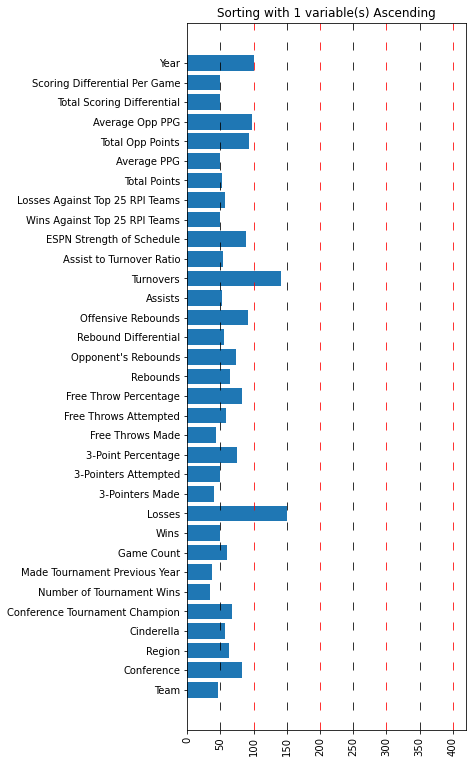

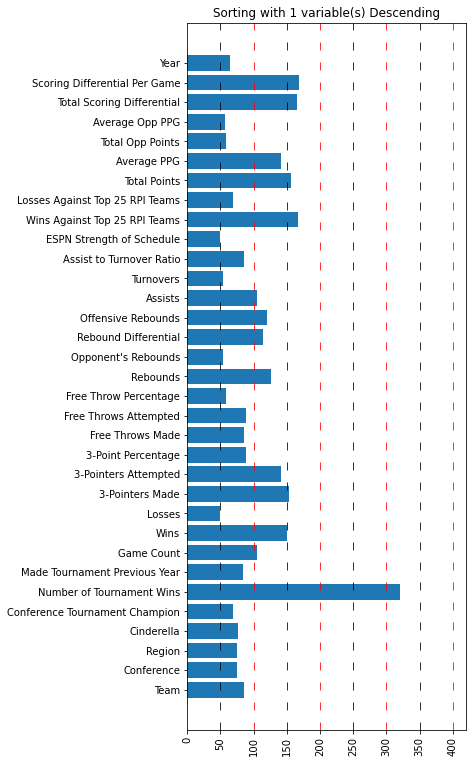

In [9]:
# Sorting based on each variable
oneVarAscending = {}
oneVarDescending = {}
# for each column
for c in df.columns:
    oneVarAscending[c] = sortingResults(data=df,sorting_keys=[c],ascending=True)
    oneVarDescending[c] = sortingResults(data=df,sorting_keys=[c],ascending=False)
    
# Graph results from oneVarAscending/Descending
graphDict(data = oneVarAscending, num_sorting = 1, ascending = 'Ascending')
graphDict(data = oneVarDescending, num_sorting = 1, ascending = 'Descending')

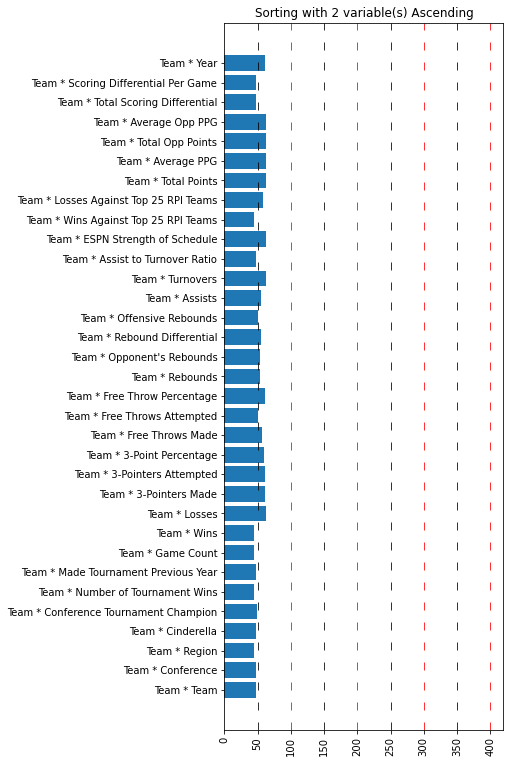

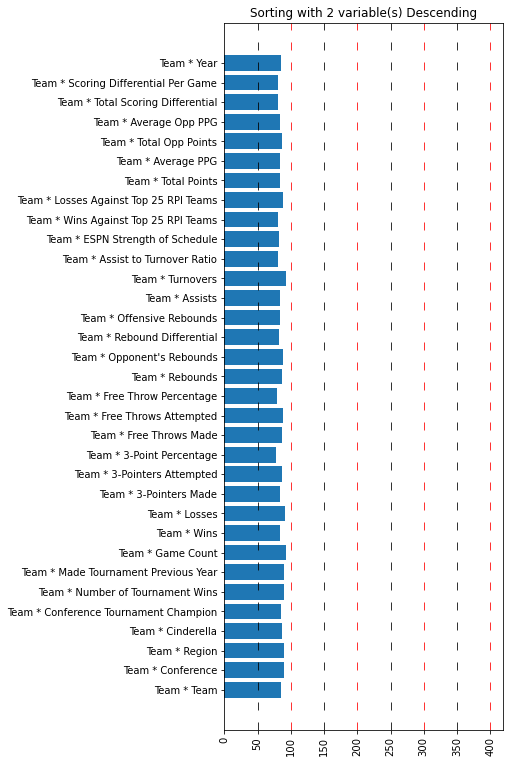

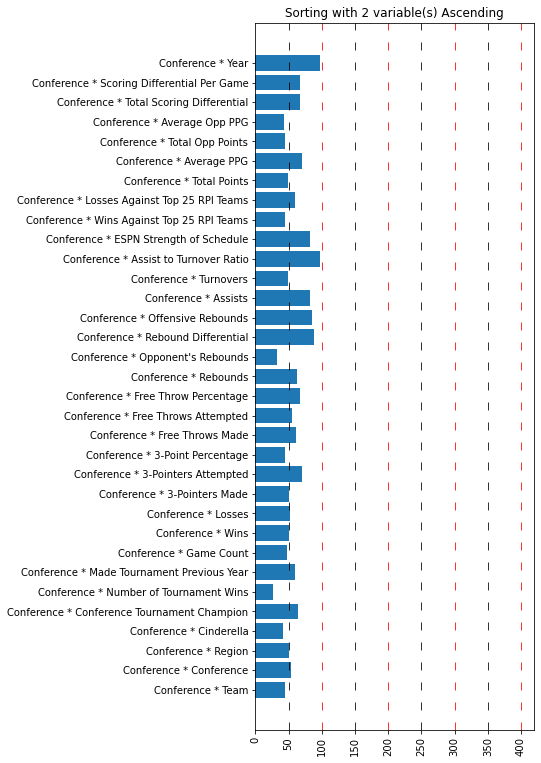

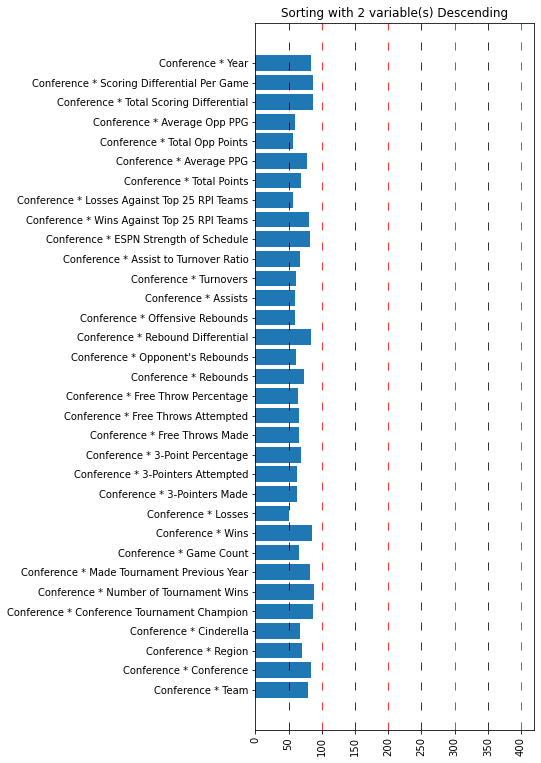

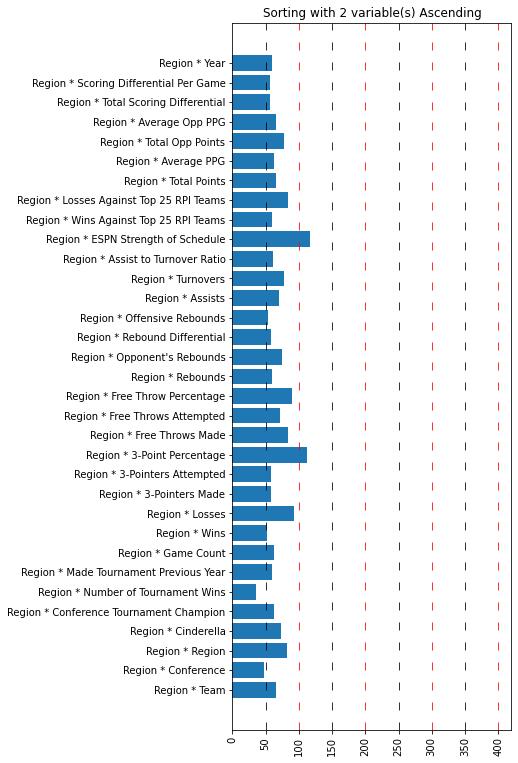

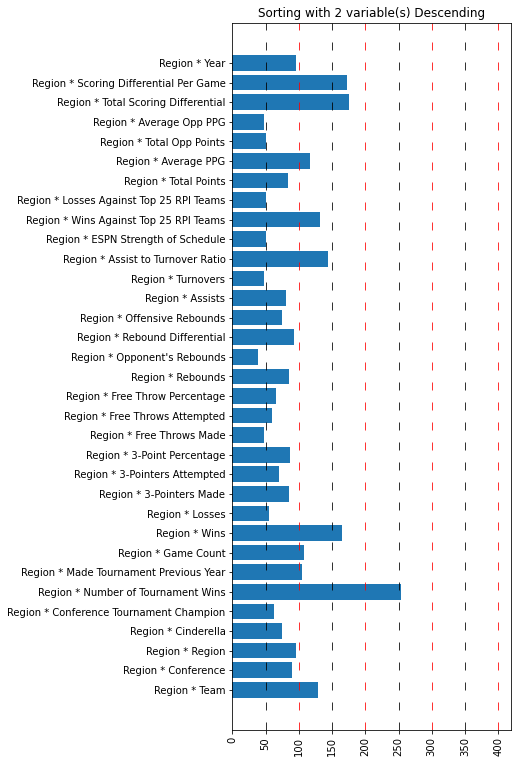

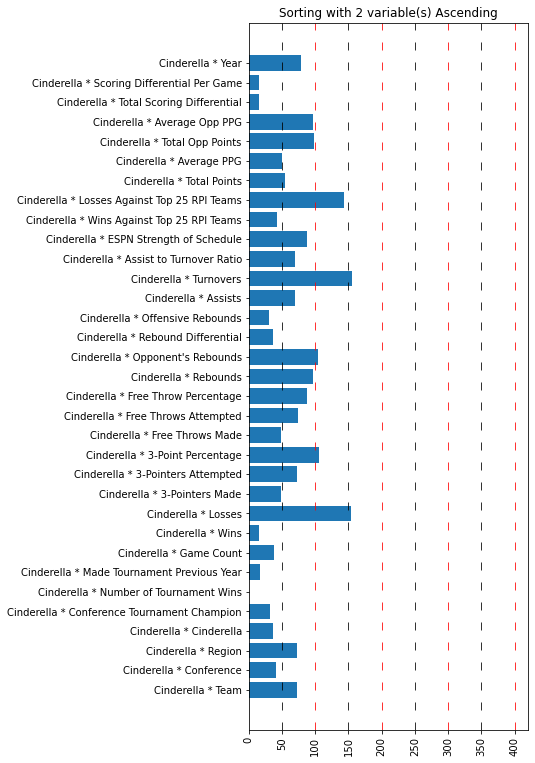

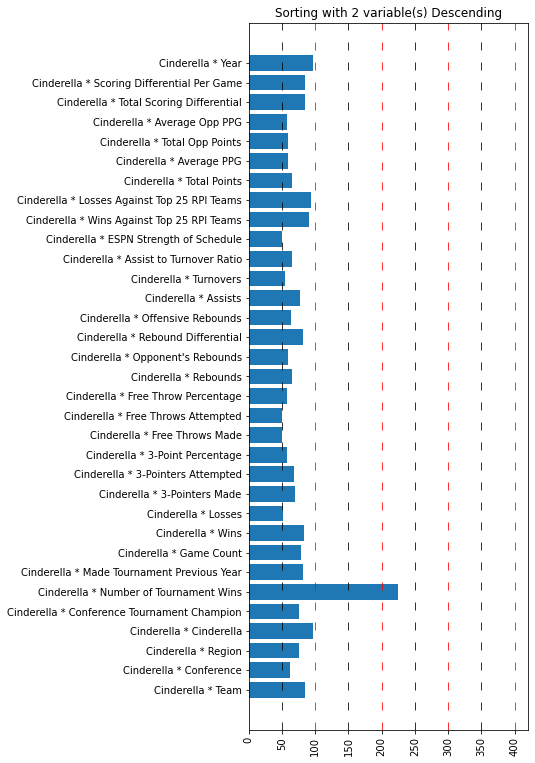

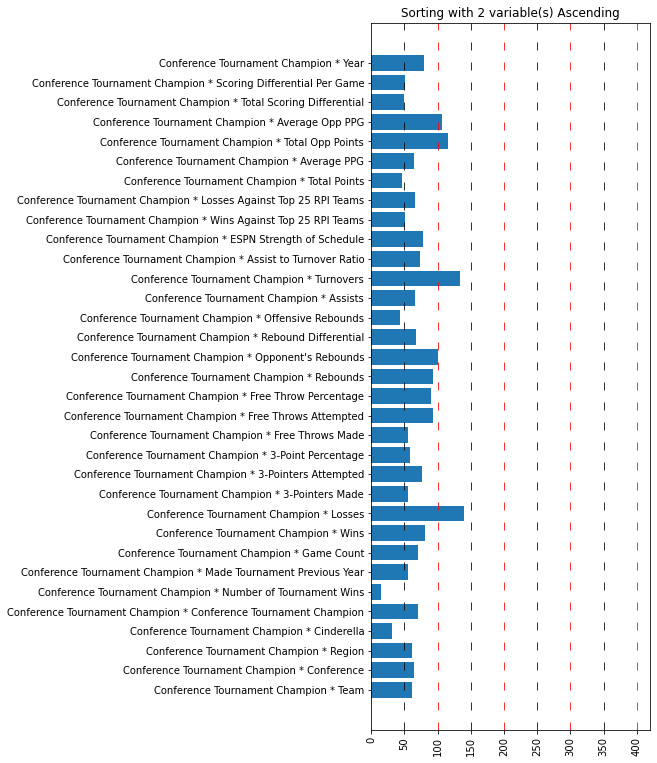

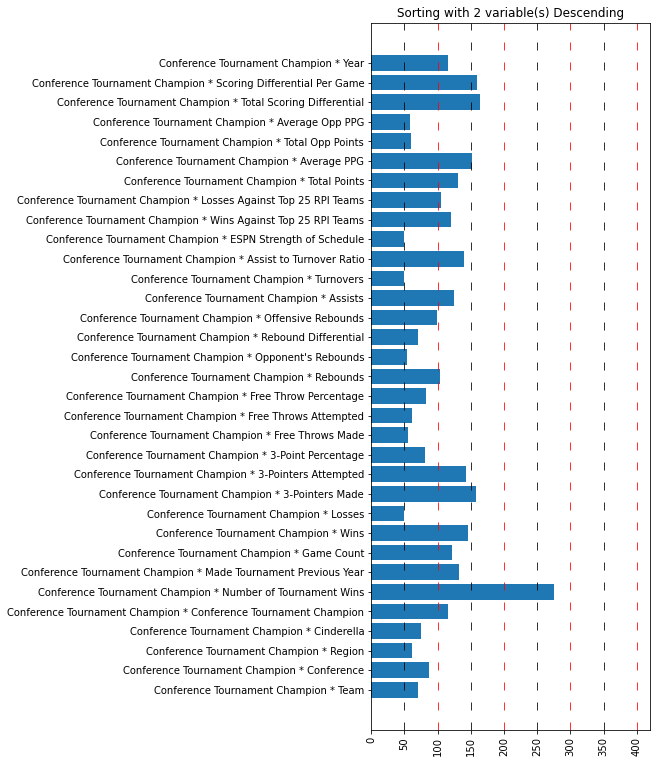

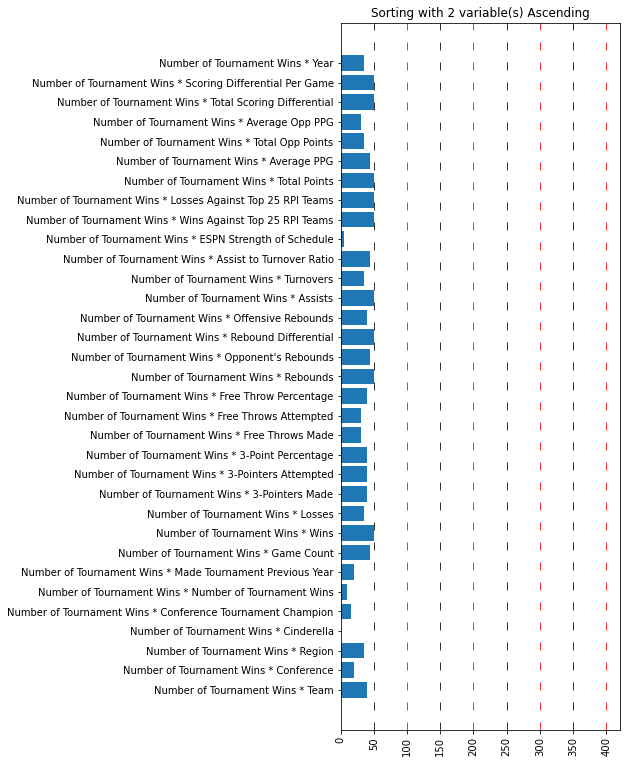

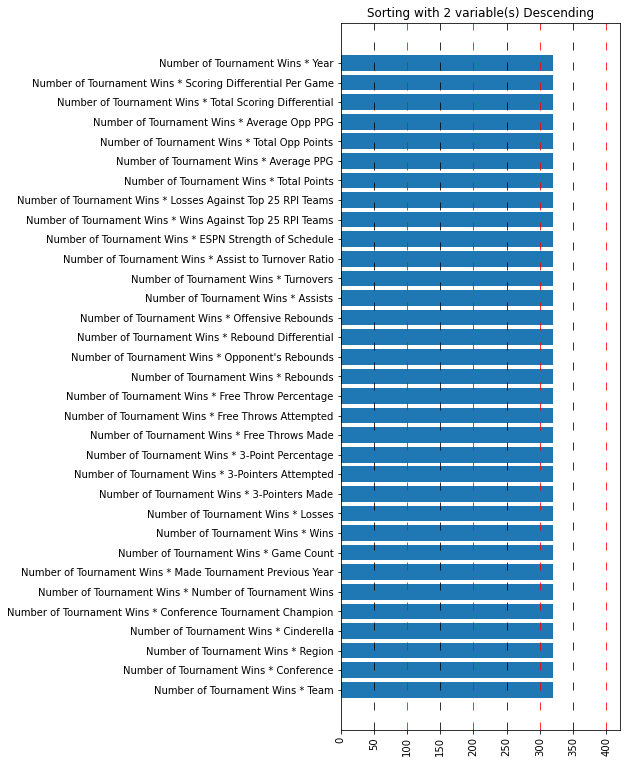

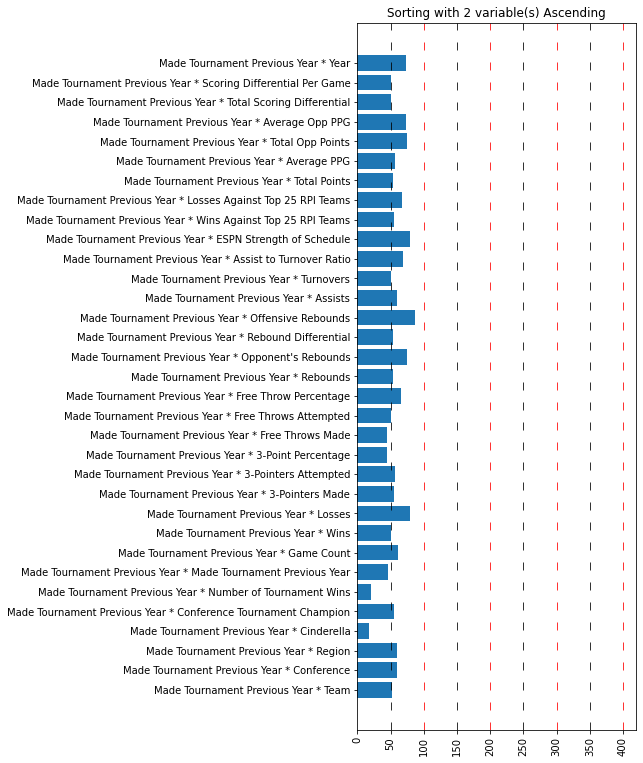

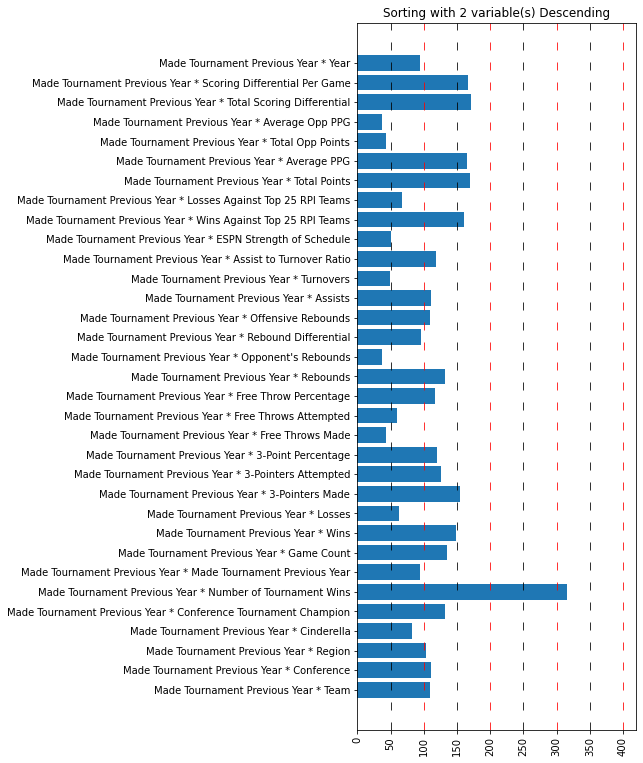

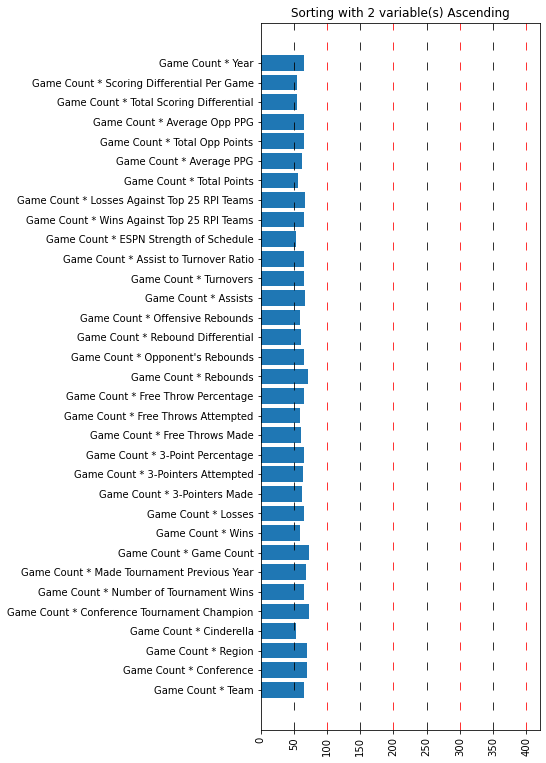

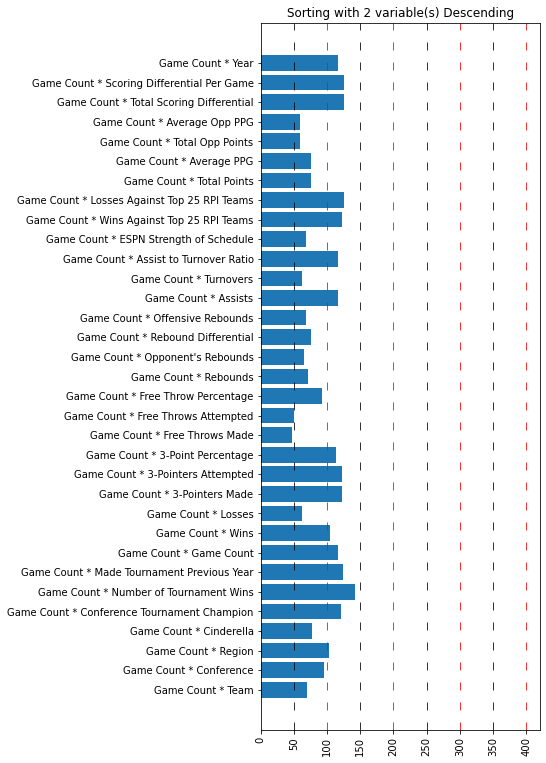

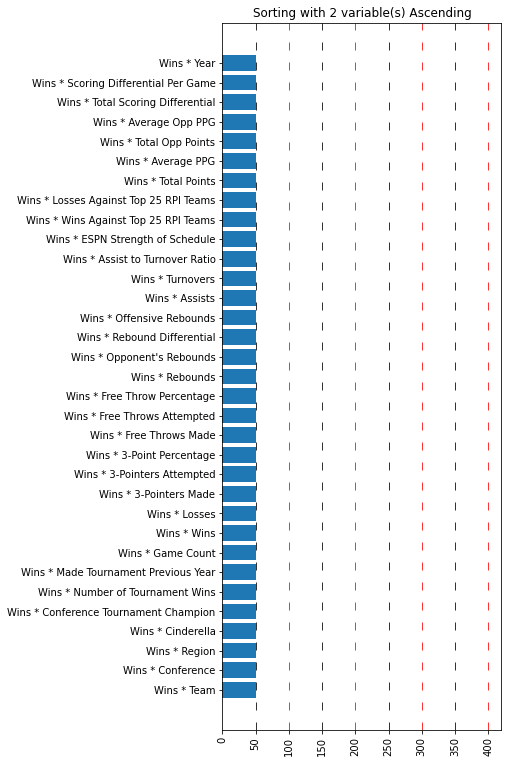

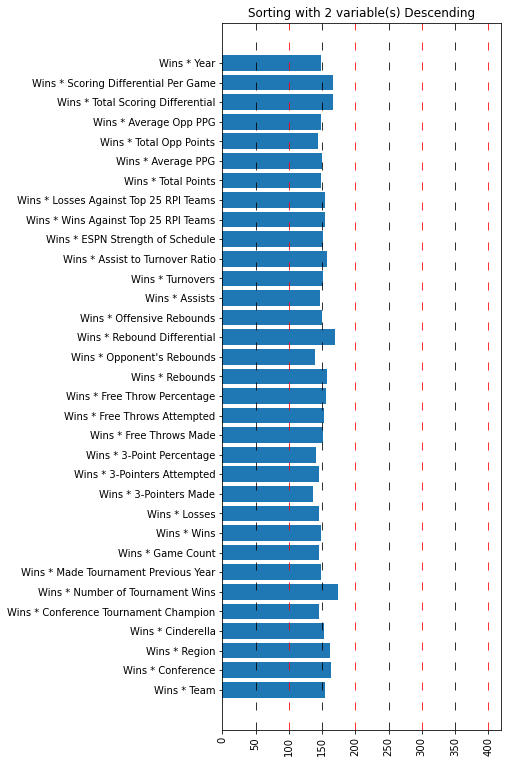

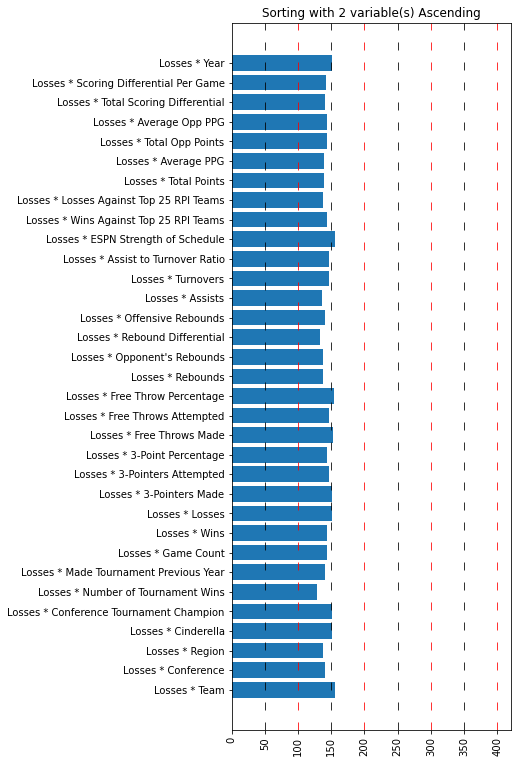

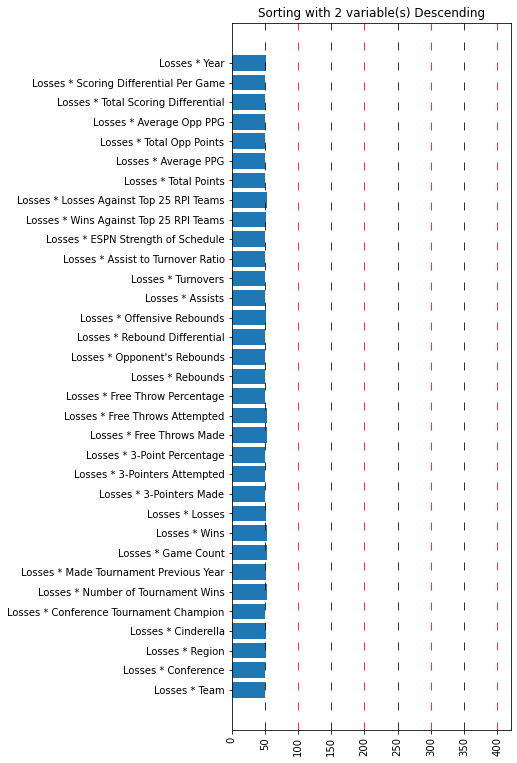

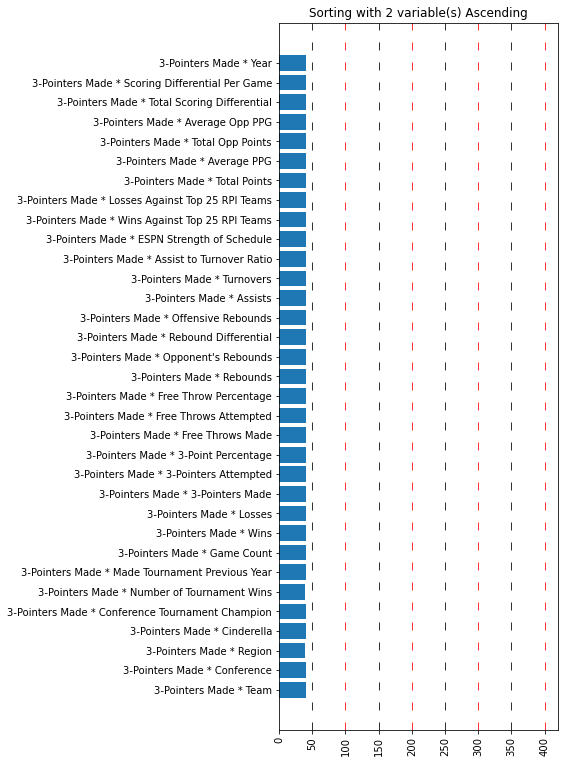

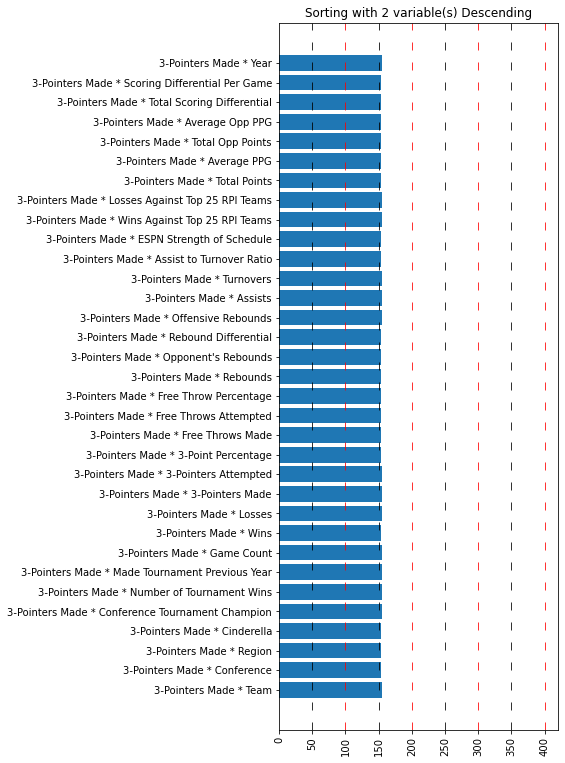

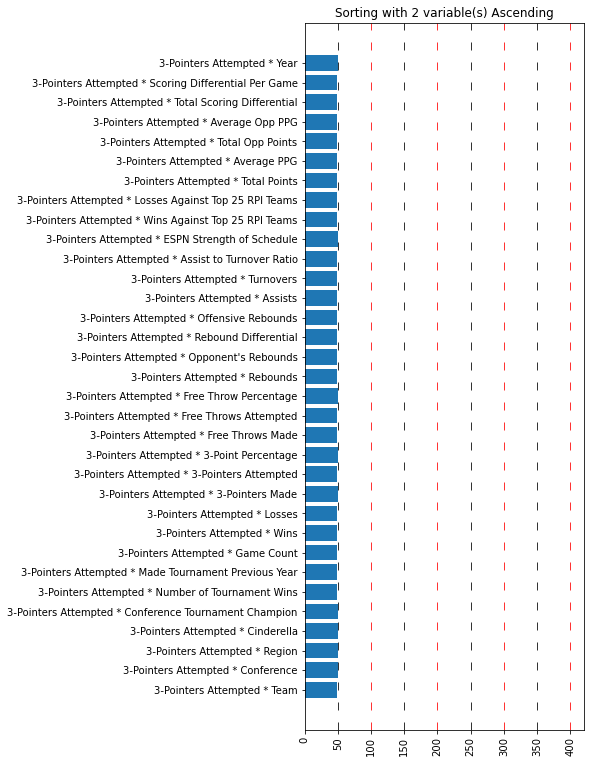

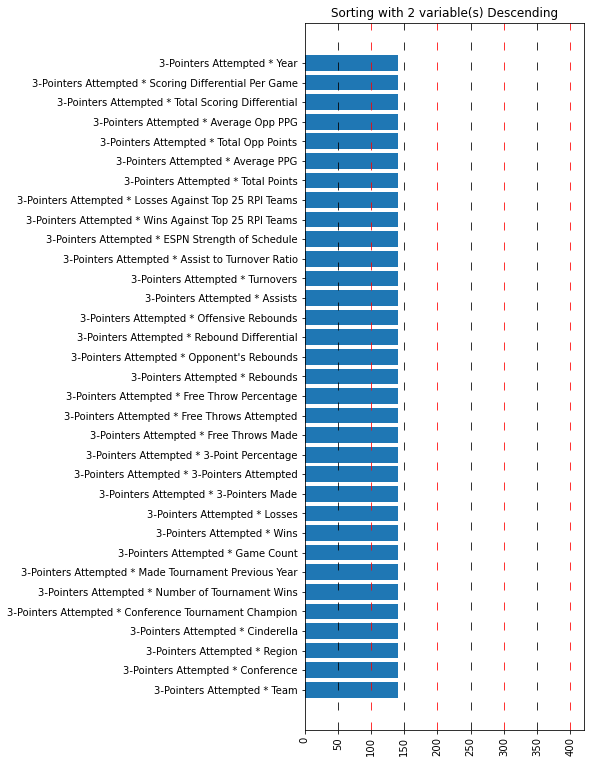

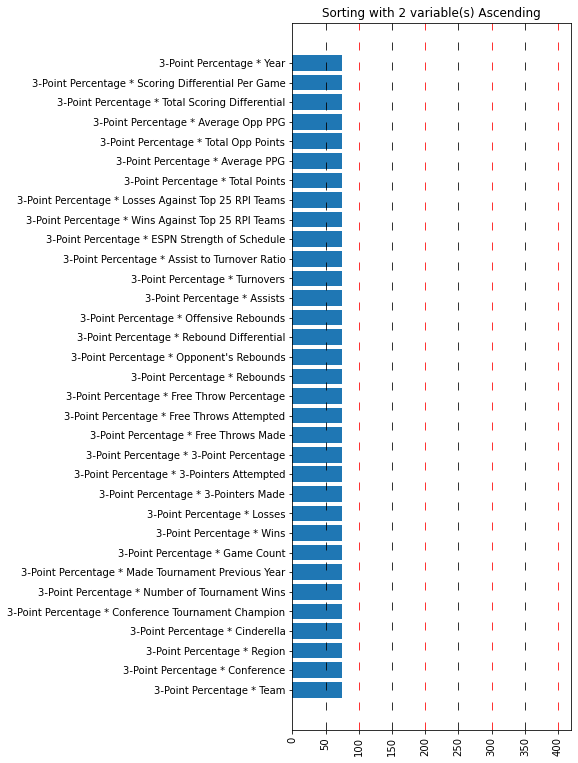

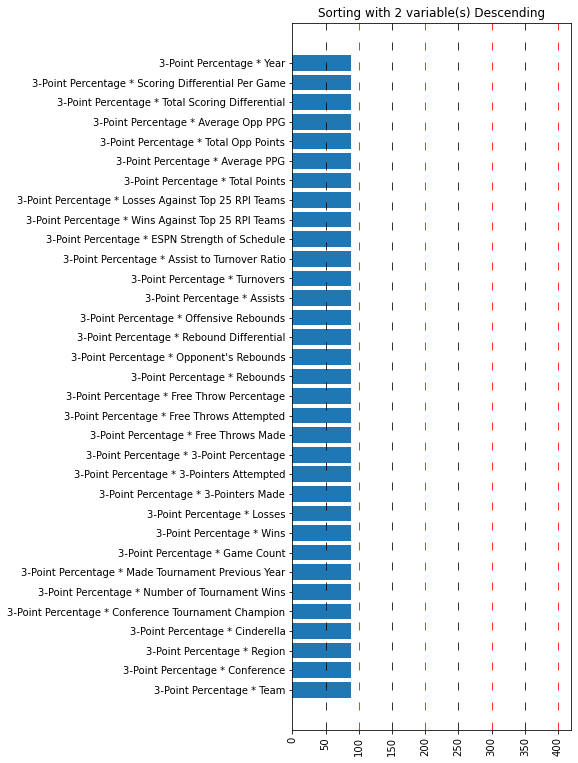

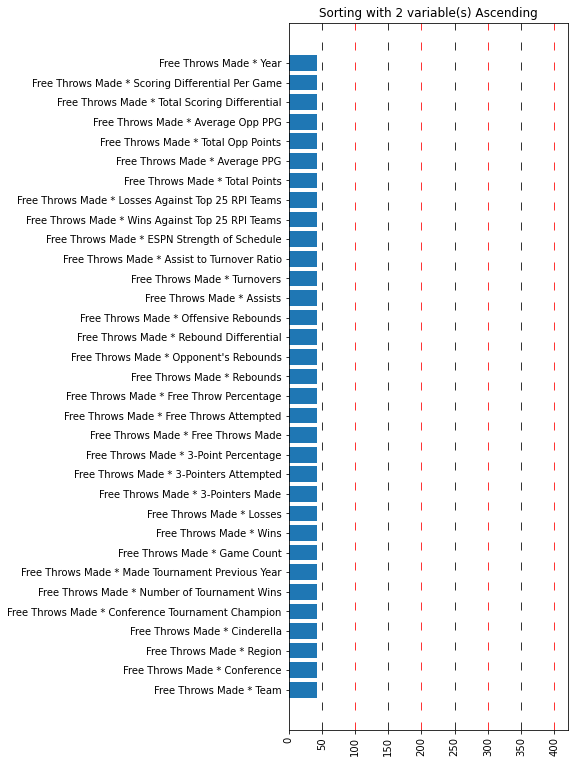

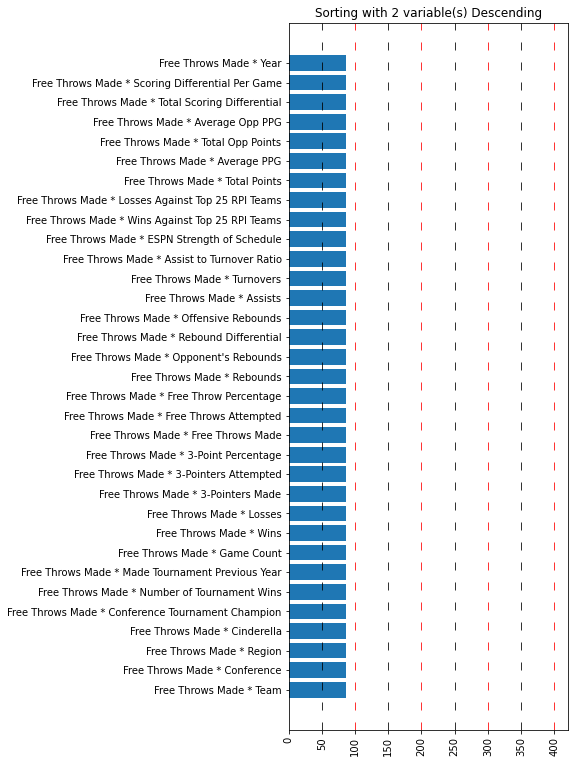

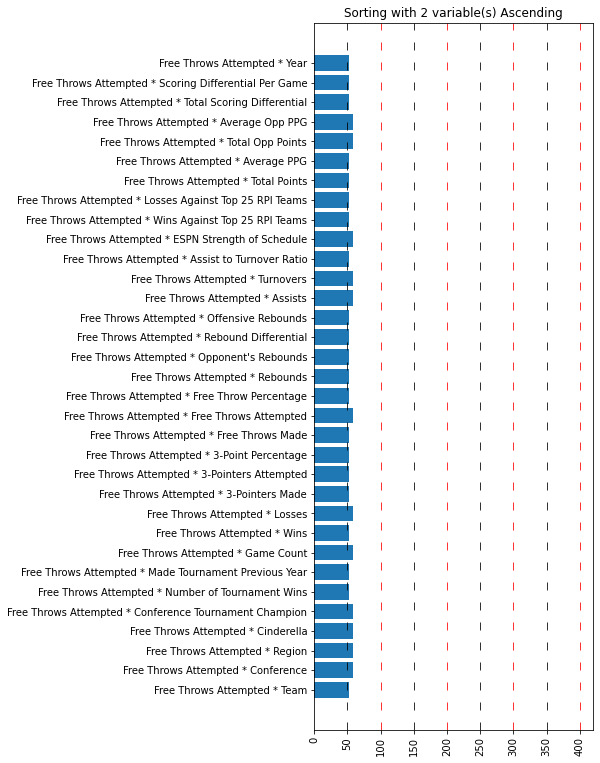

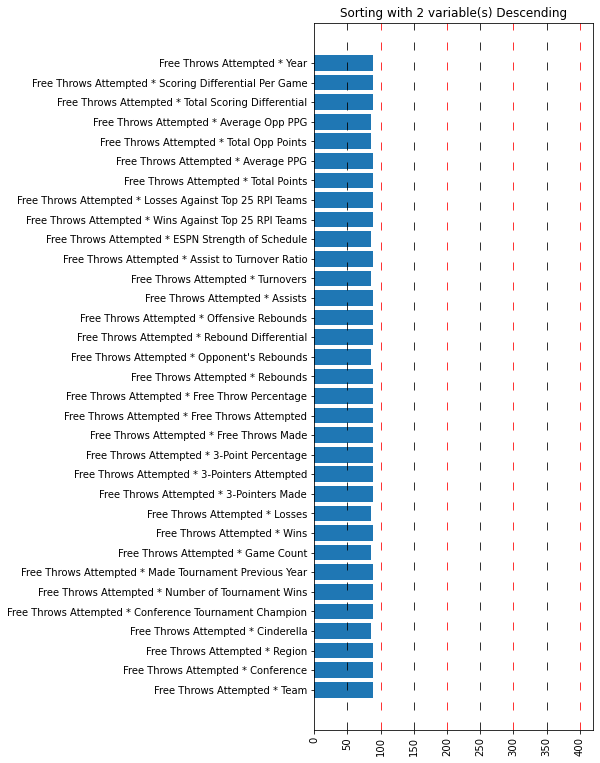

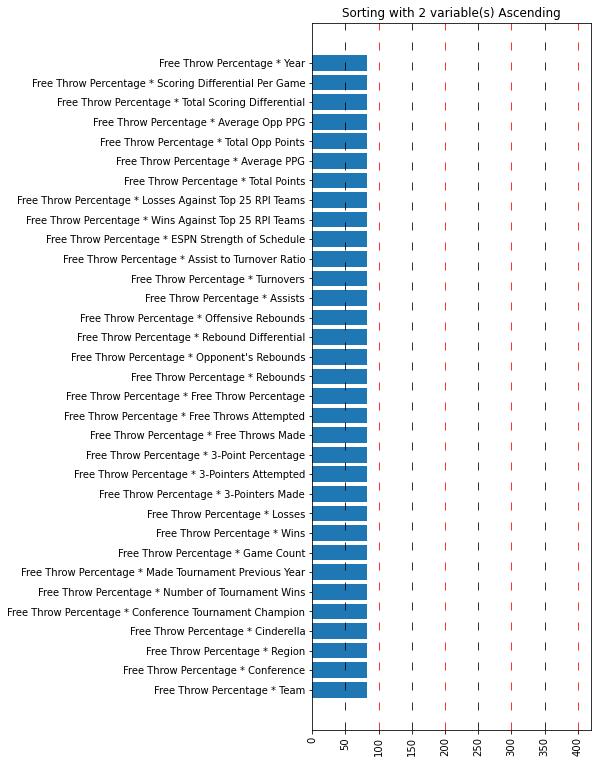

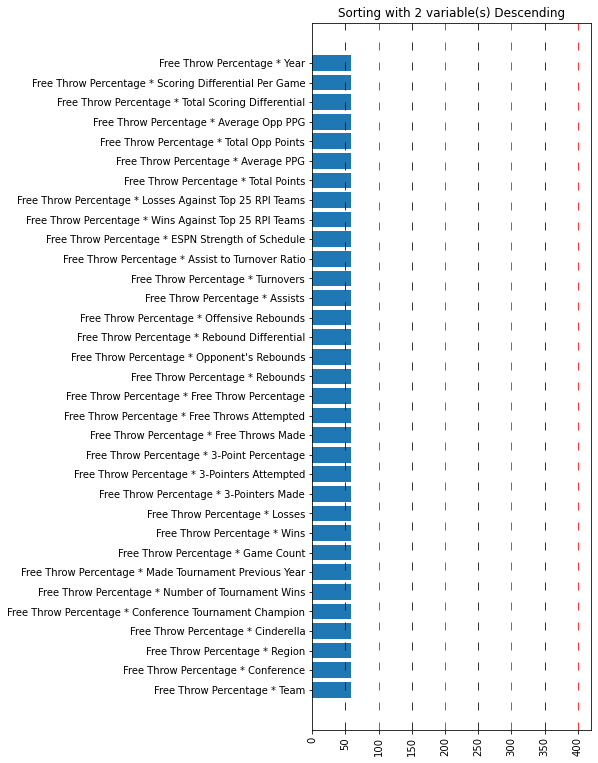

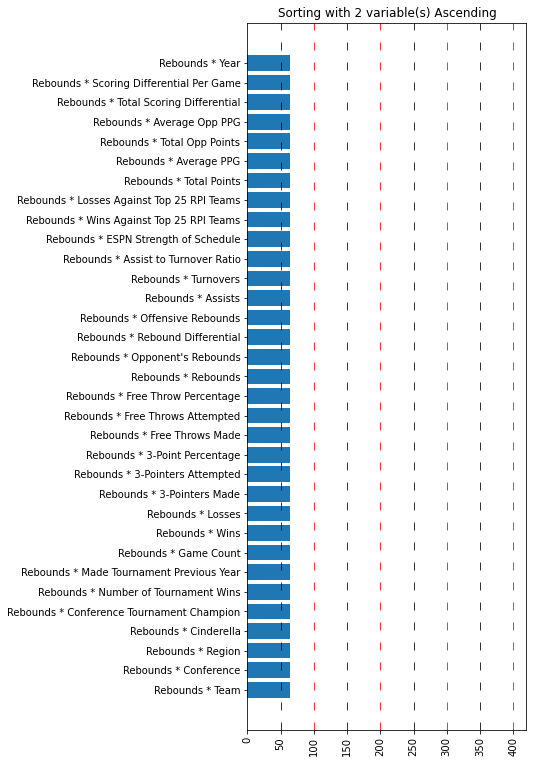

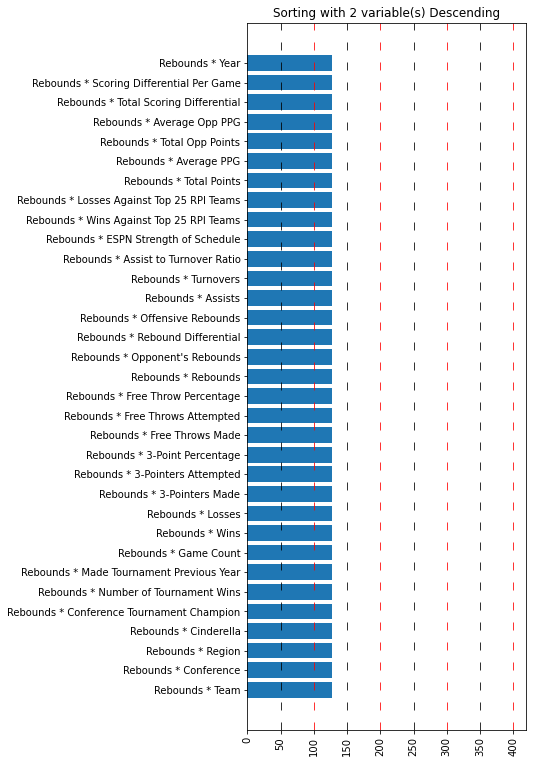

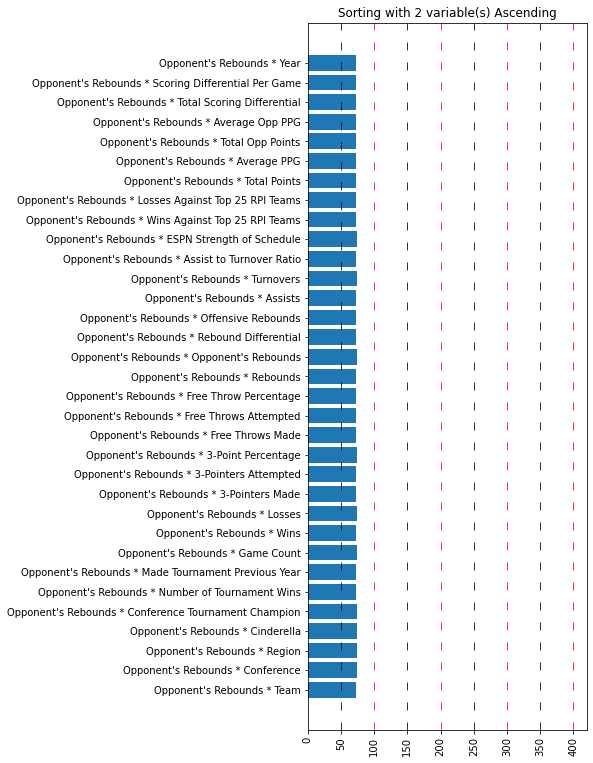

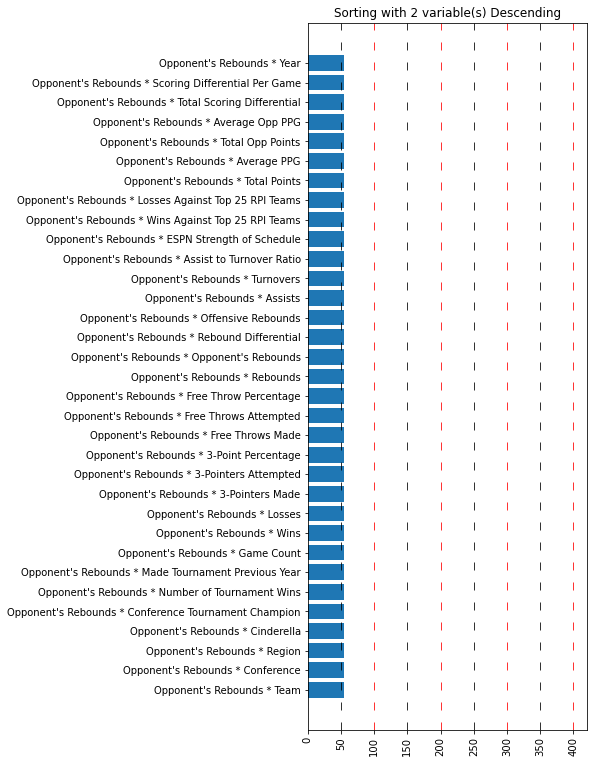

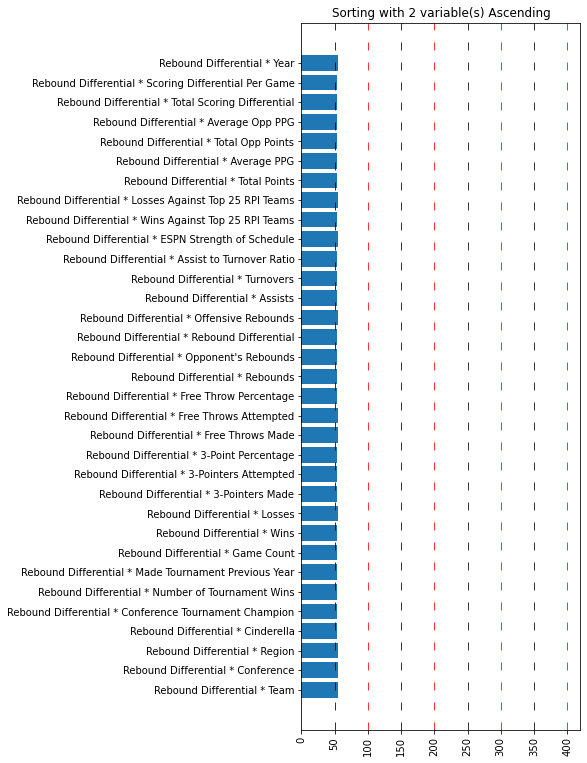

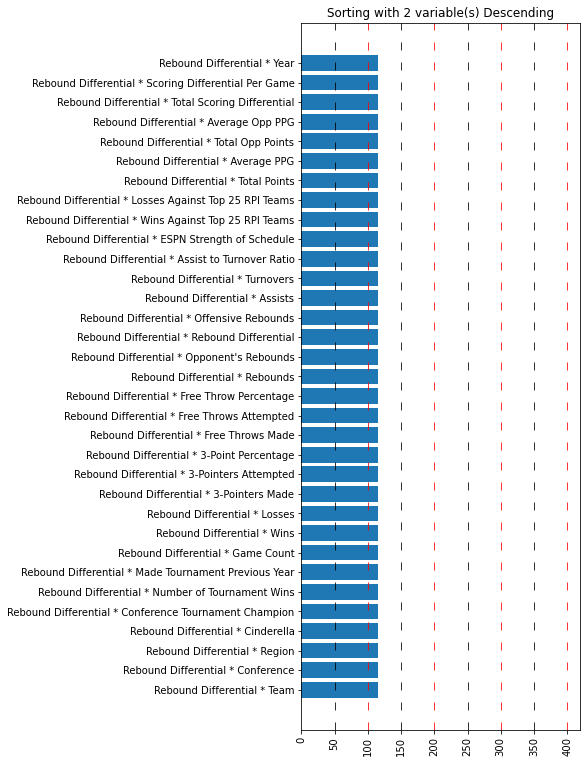

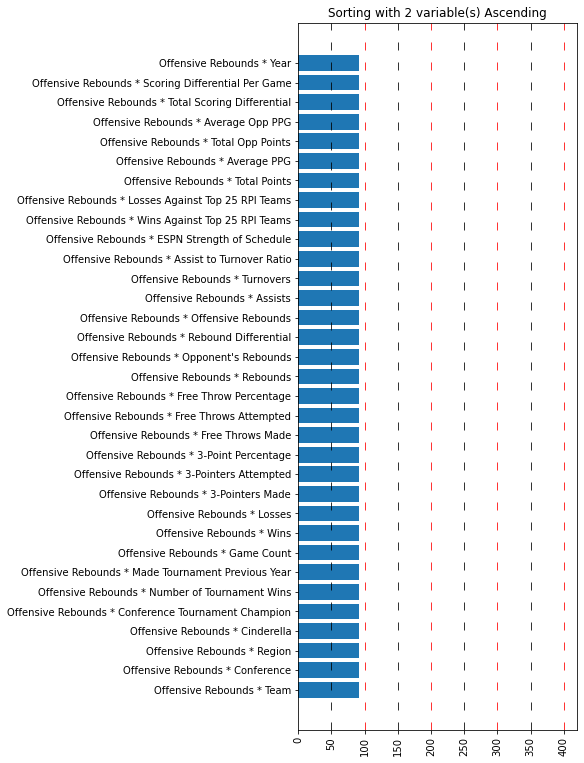

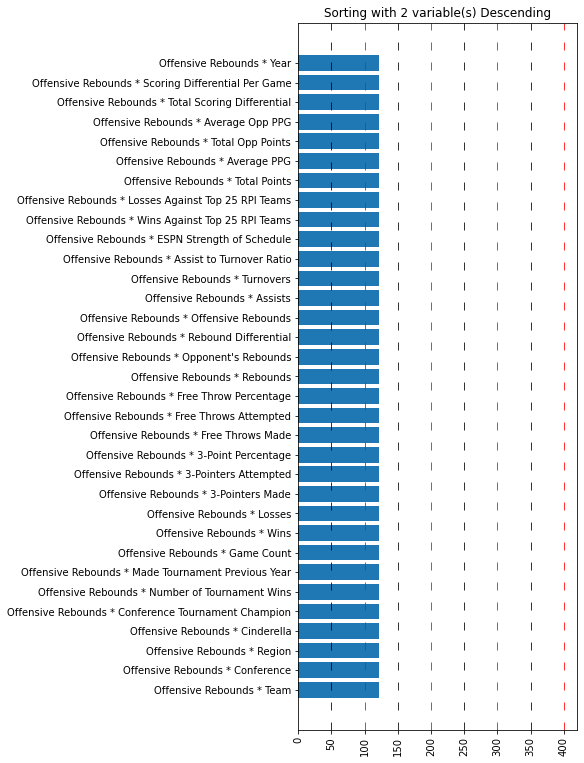

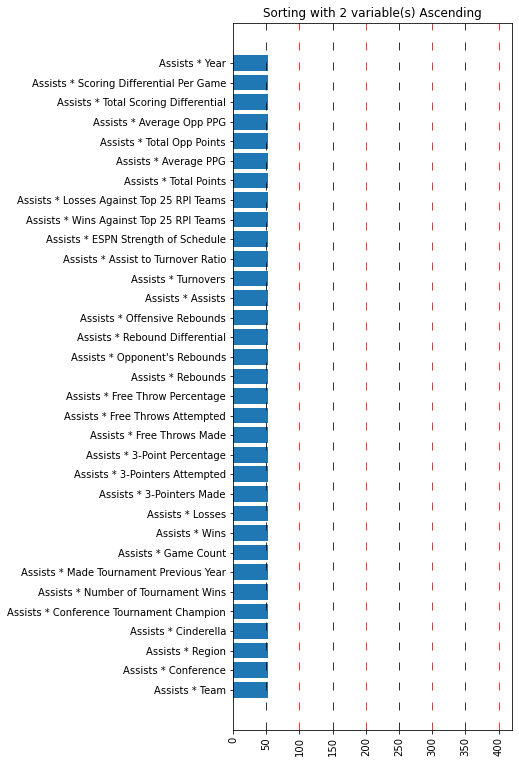

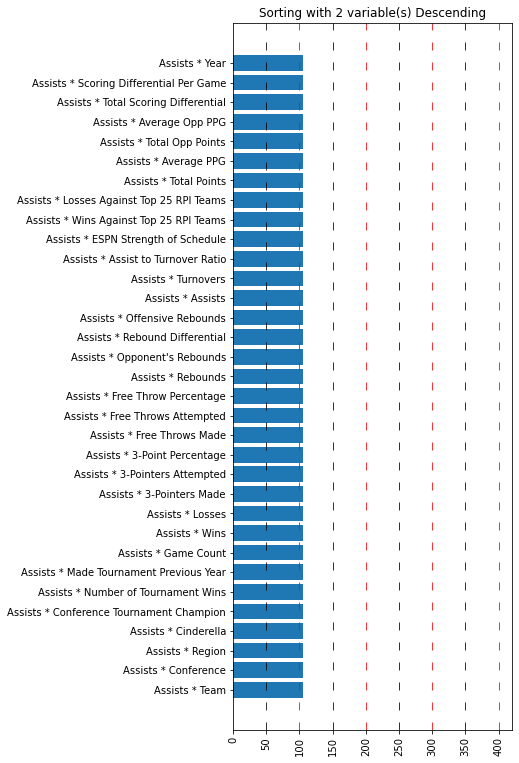

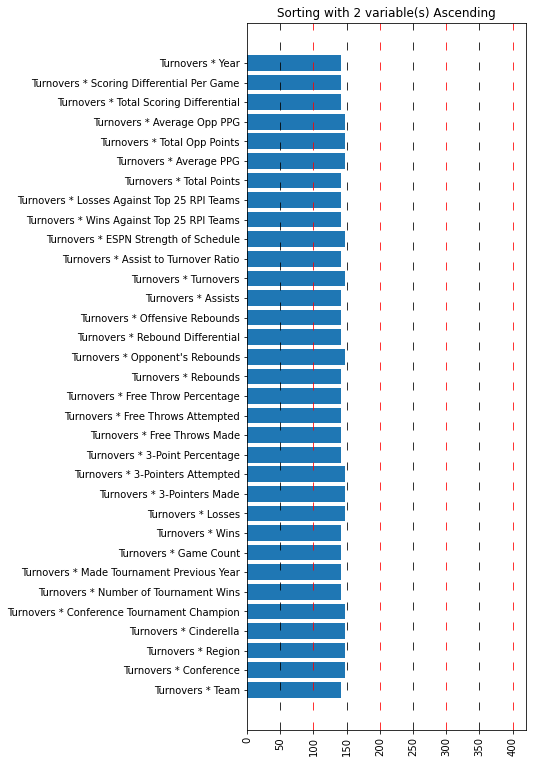

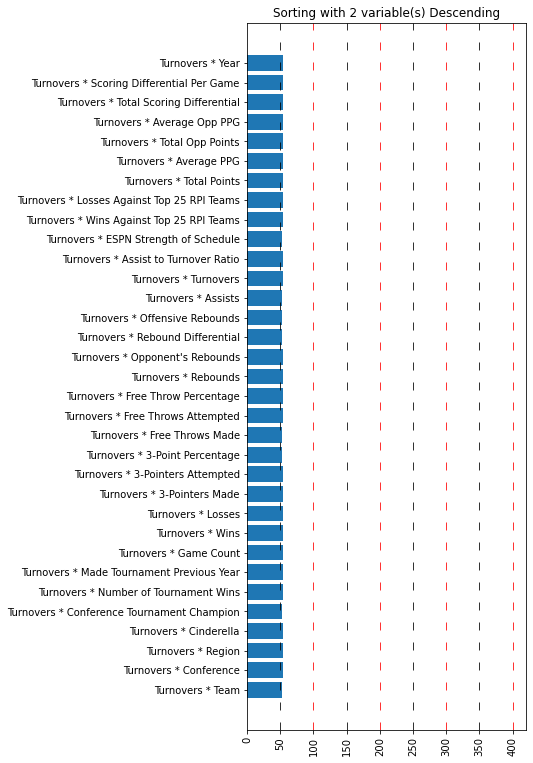

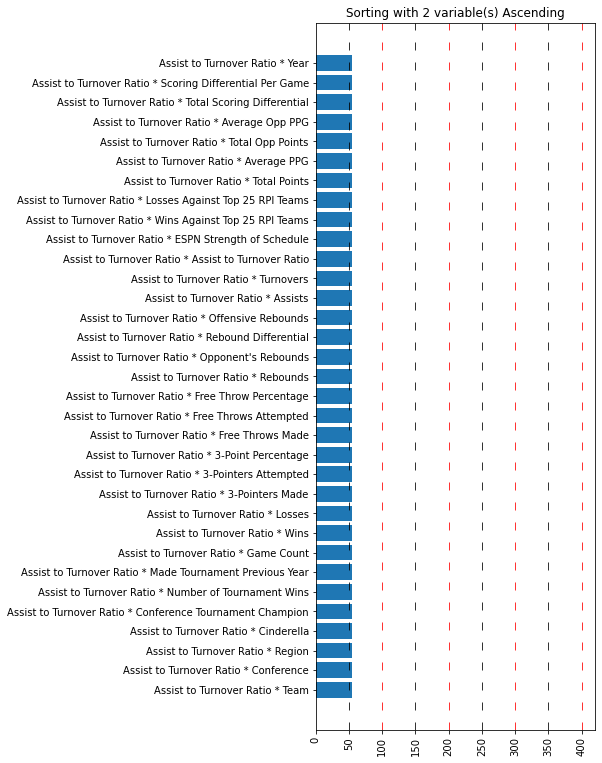

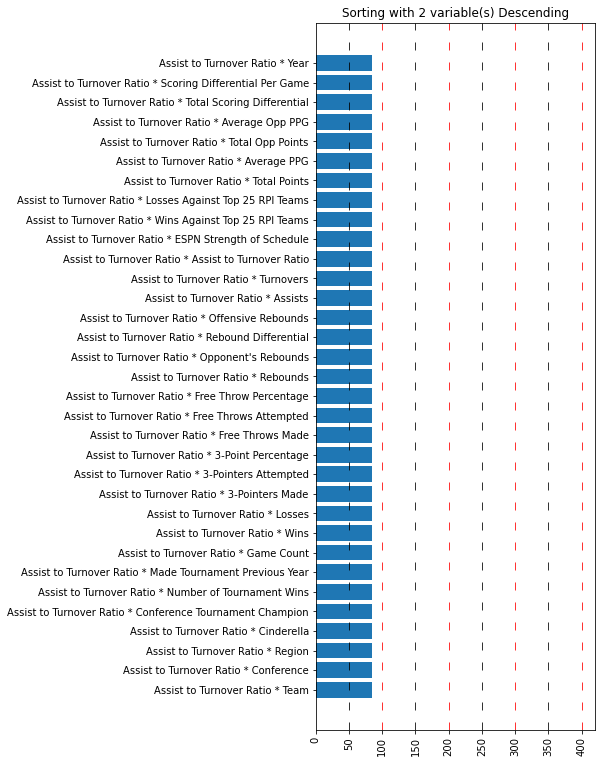

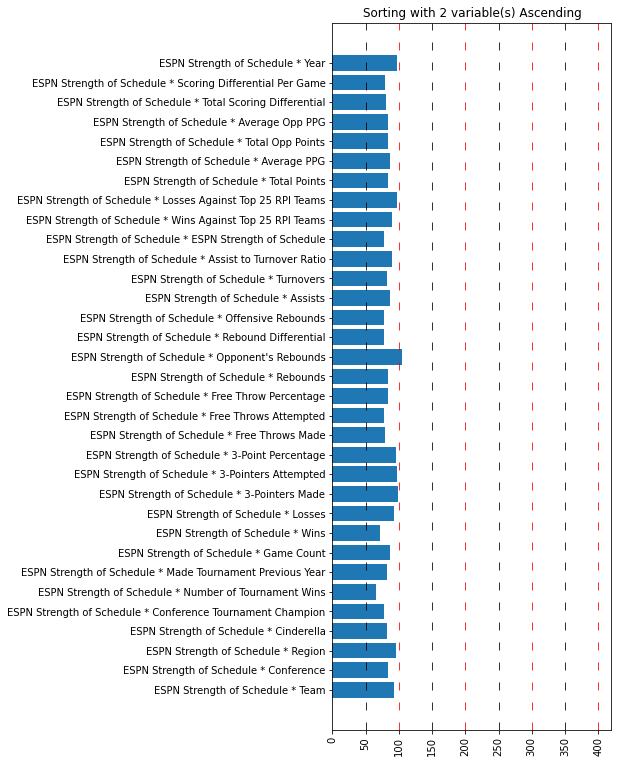

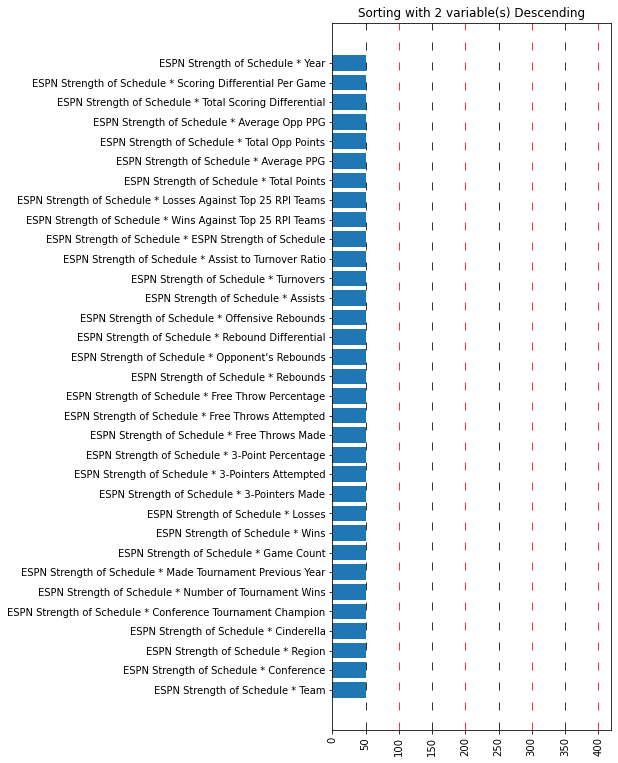

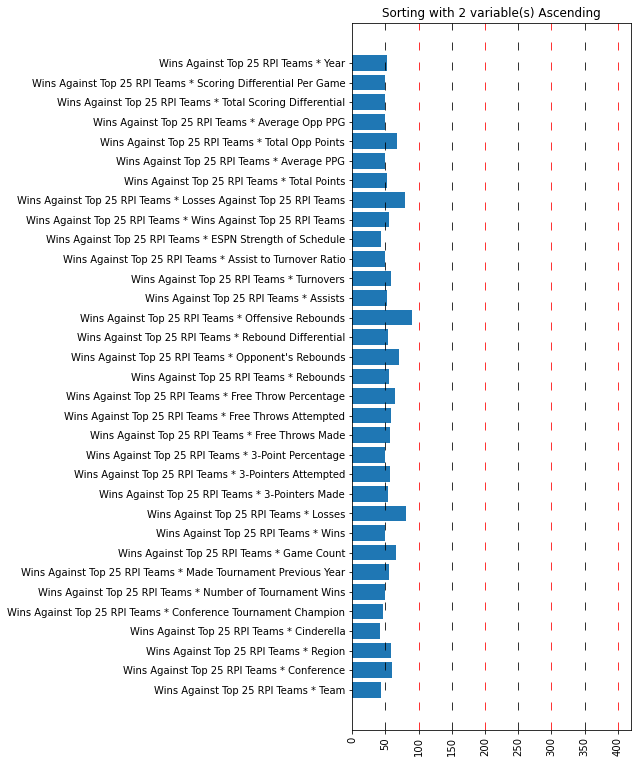

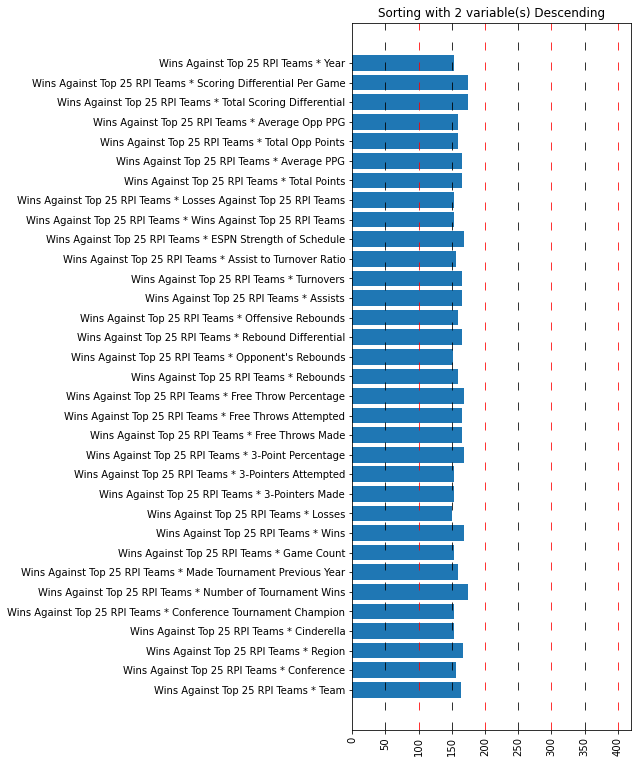

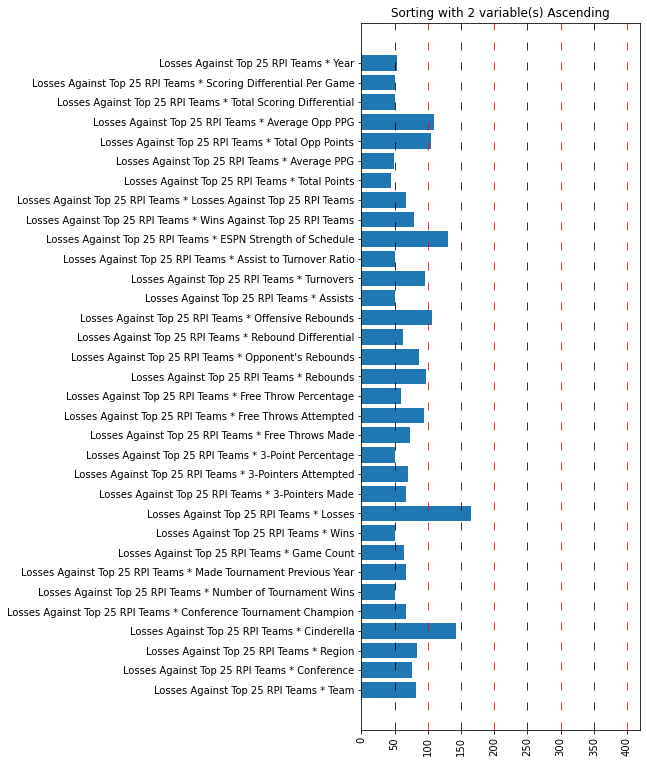

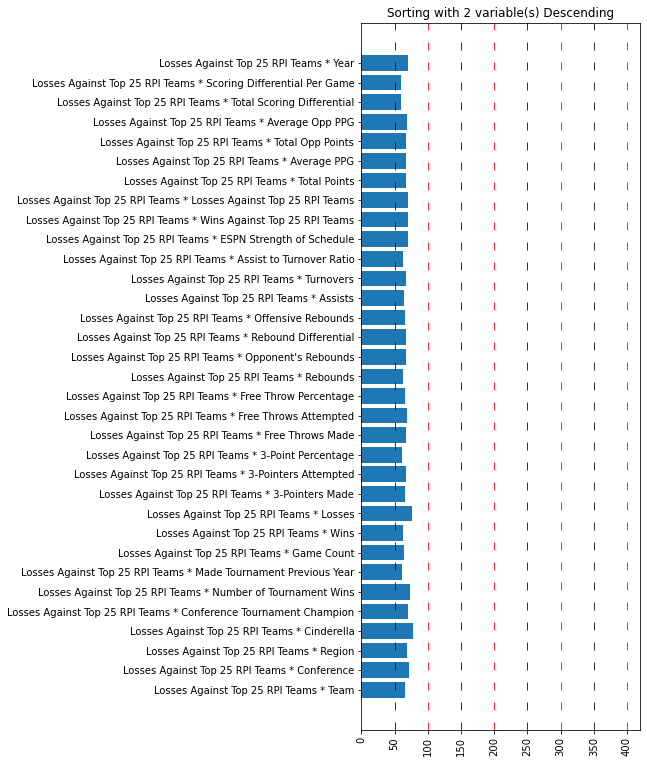

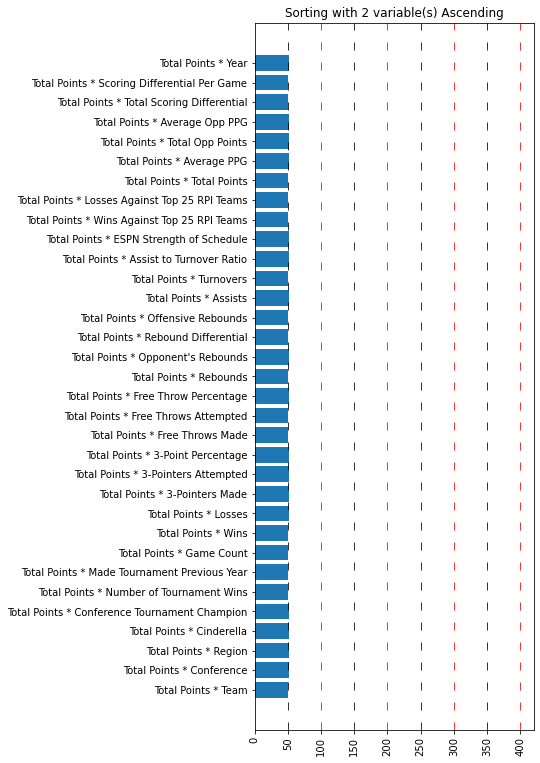

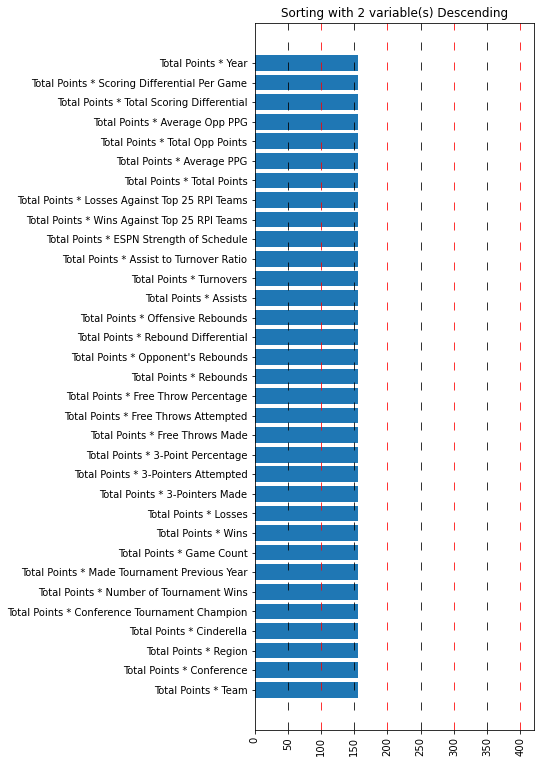

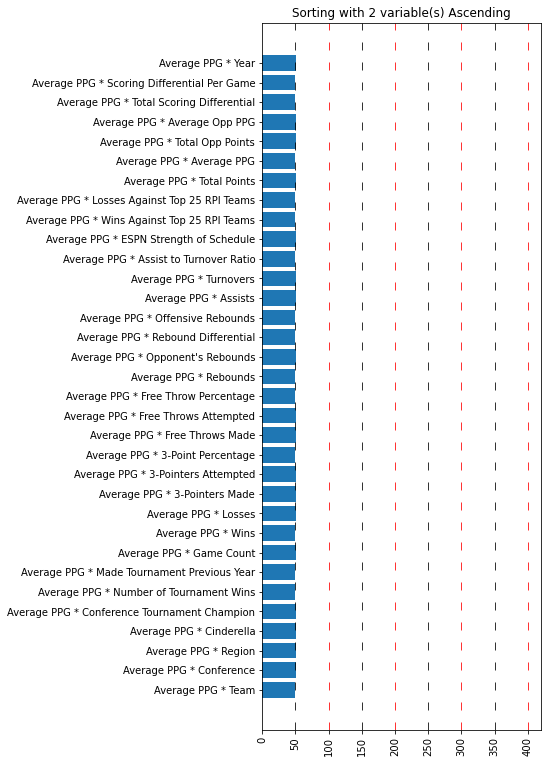

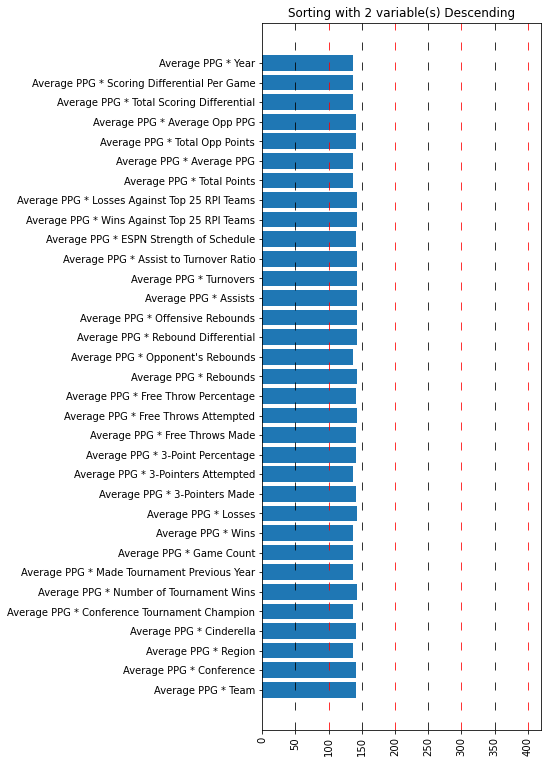

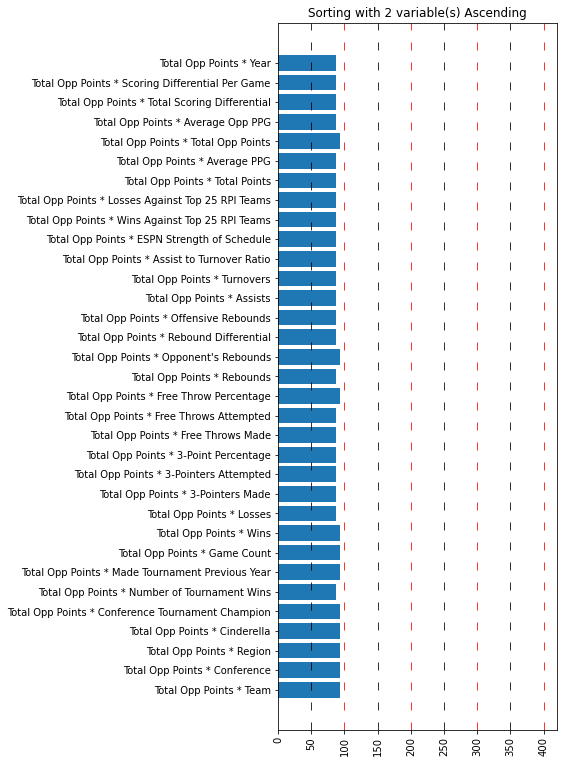

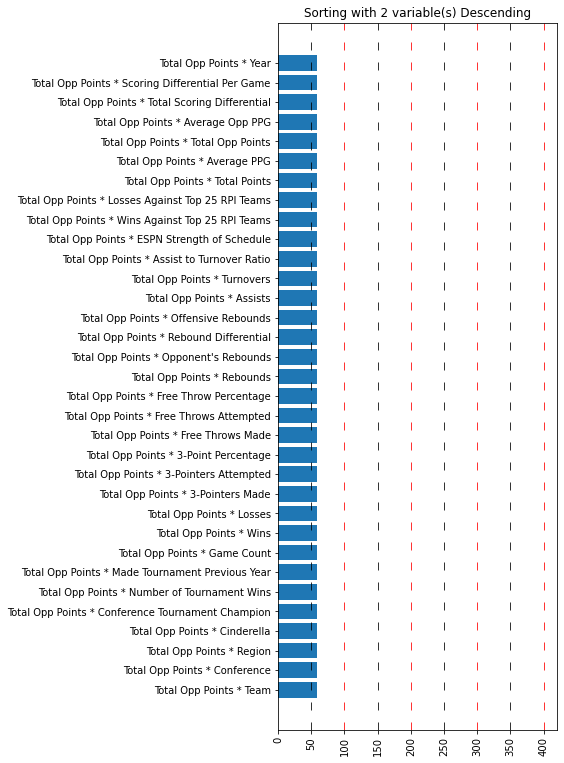

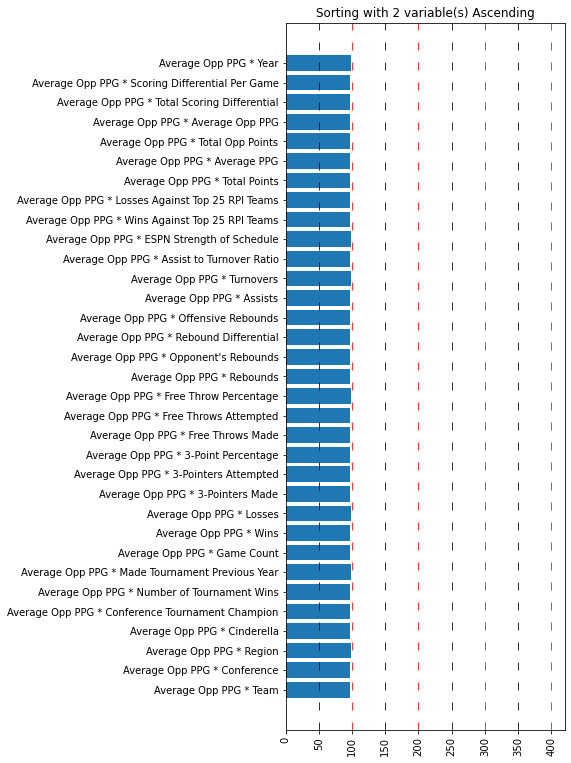

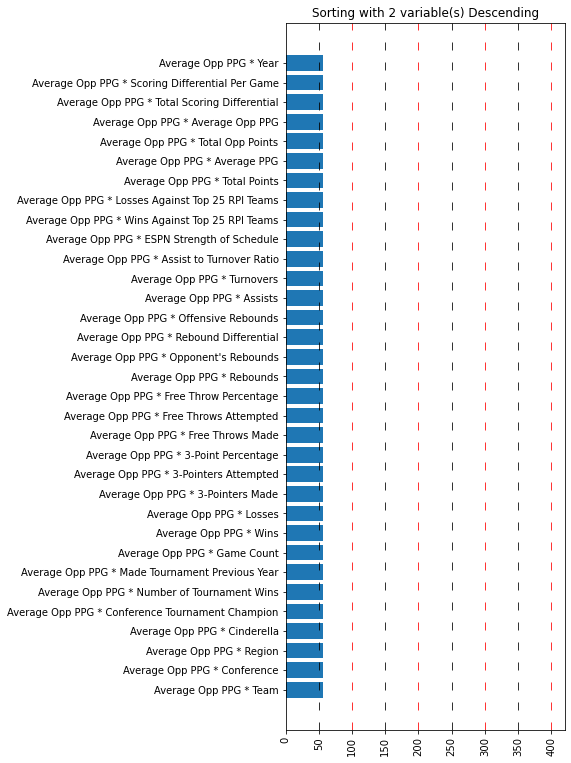

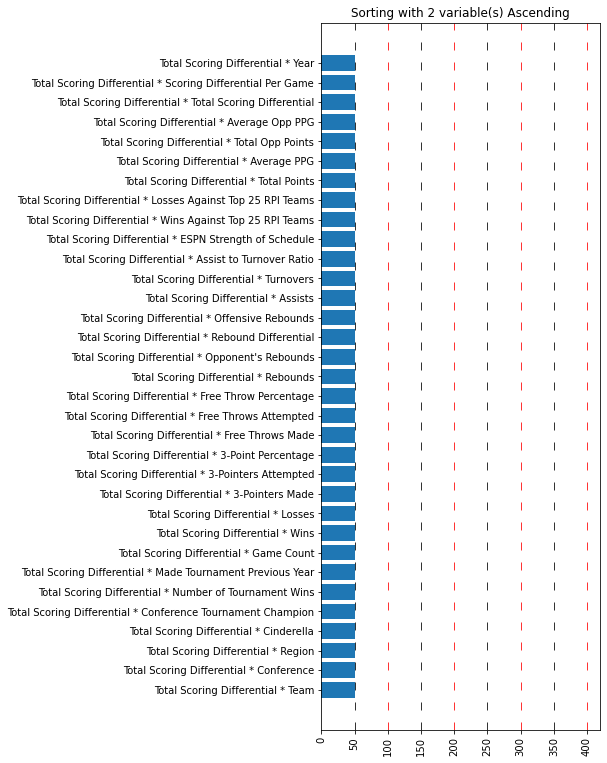

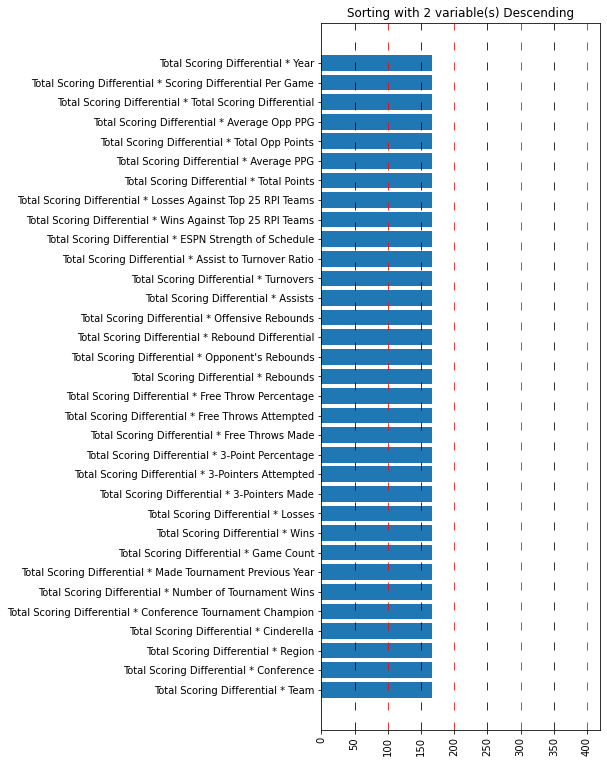

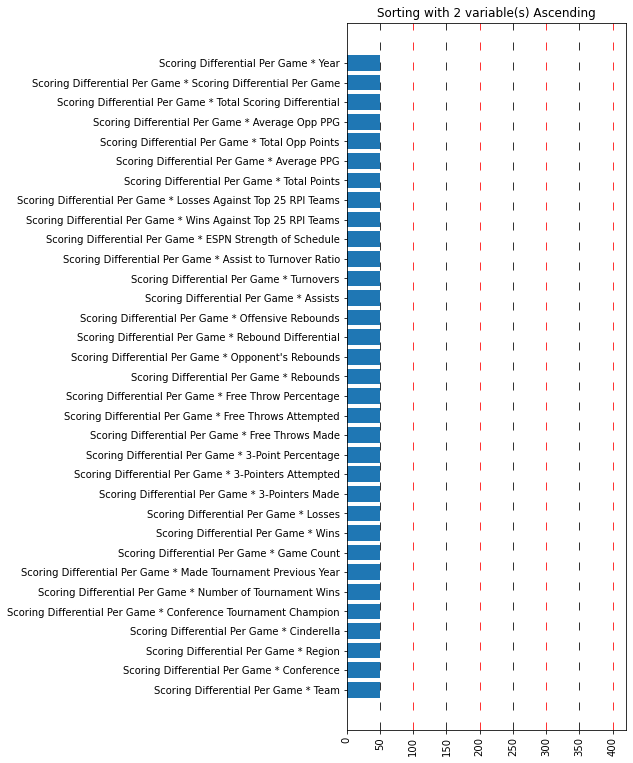

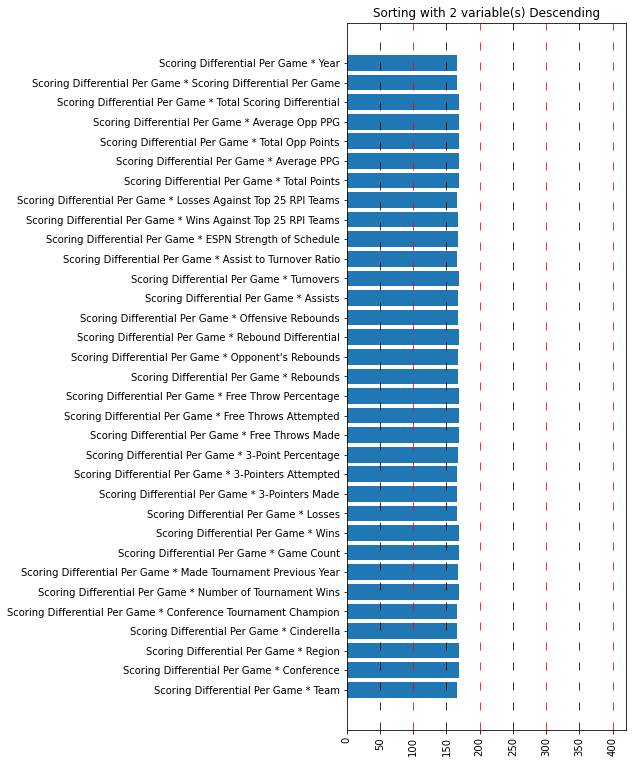

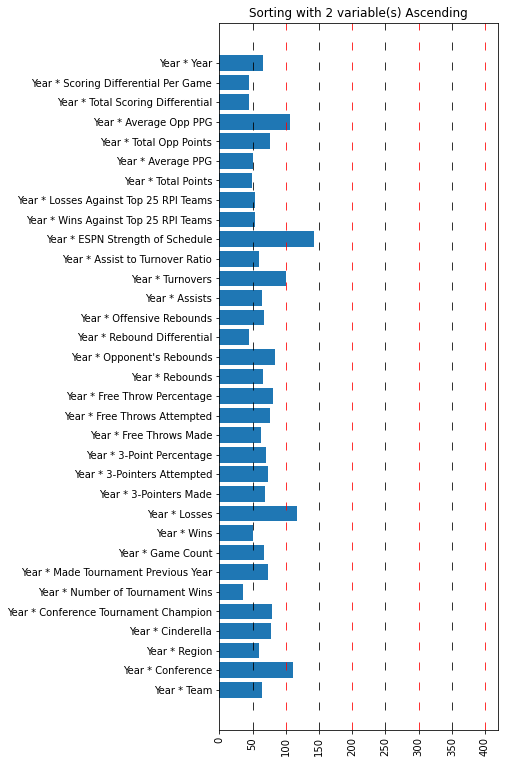

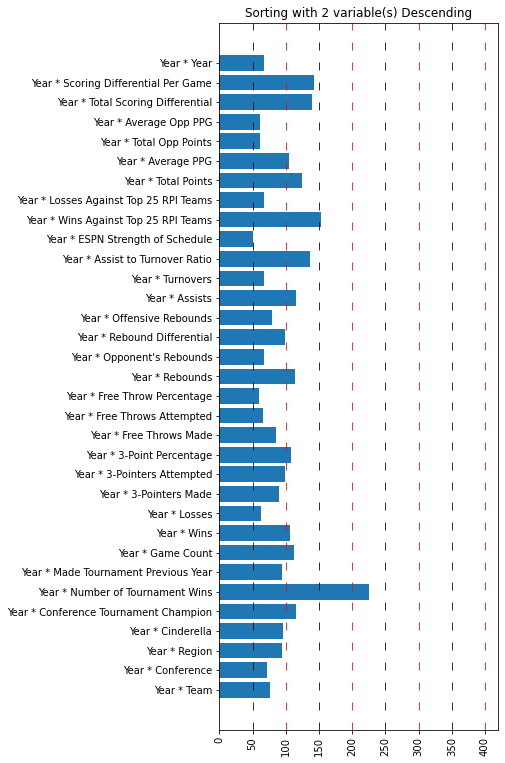

In [14]:
# Sorting with 2 variables
twoVarOverallAsc = {}
twoVarOverallDes = {}
for c in df.columns:
    twoVarAscending = {}
    twoVarDescending = {}
    for d in df.columns:
        twoVarAscending[str(c+' * '+d)] = sortingResults(data=df,sorting_keys=[c,d],ascending=True)
        twoVarDescending[str(c+' * '+d)] = sortingResults(data=df,sorting_keys=[c,d],ascending=False)
    graphDict(data = twoVarAscending, num_sorting = 2, ascending = 'Ascending')
    graphDict(data = twoVarDescending, num_sorting = 2, ascending = 'Descending')
    twoVarOverallAsc[c] = twoVarAscending
    twoVarOverallDes[c] = twoVarDescending
    

In [11]:
df.head(10)

Team Conference   Region  Cinderella  Conference Tournament Champion  \
0     Florida        SEC     West         1.0                             0.0   
1    Ohio St.    Big Ten  Midwest         1.0                             0.0   
2    Oklahoma     Big 12    South         1.0                             0.0   
3  Louisville        ACC     East         0.0                             0.0   
4   Minnesota    Big Ten     East         1.0                             0.0   
5    Syracuse        ACC     West         0.0                             0.0   
6    Iowa St.     Big 12  Midwest         0.0                             1.0   
7      Baylor     Big 12     West         1.0                             0.0   
8        Iowa    Big Ten    South         1.0                             0.0   
9   Wisconsin    Big Ten    South         0.0                             0.0   

   Number of Tournament Wins  Made Tournament Previous Year  Game Count  Wins  \
0                        1.0                            1.0        34.0  19.0   
1                        1.0                            1.0        33.0  19.0   
2                        1.0                            1.0        32.0  19.0   
3                        0.0                            0.0        33.0  20.0   
4                        1.0                            0.0        34.0  21.0   
5                        0.0                            1.0        33.0  20.0   
6                        0.0                            0.0        34.0  23.0   
7                        1.0                            0.0        32.0  19.0   
8                        1.0                            0.0        33.0  22.0   
9                        0.0                            0.0        33.0  23.0   

   Losses  ...  ESPN Strength of Schedule  Wins Against Top 25 RPI Teams  \
0    15.0  ...                       24.0                            3.0   
1    14.0  ...                       17.0                            7.0   
2    13.0  ...                       14.0                            7.0   
3    13.0  ...                        6.0                            5.0   
4    13.0  ...                       18.0                            8.0   
5    13.0  ...                       30.0                            4.0   
6    11.0  ...                       28.0                           10.0   
7    13.0  ...                       41.0                            8.0   
8    11.0  ...                       26.0                            8.0   
9    10.0  ...                        2.0                           11.0   

   Losses Against Top 25 RPI Teams  Total Points  Average PPG  \
0                             12.0        2321.0         68.3   
1                             11.0        2298.0         69.6   
2                             11.0        2277.0         71.2   
3                             11.0        2460.0         74.5   
4                             10.0        2407.0         70.8   
5                             10.0        2301.0         69.7   
6                              9.0        2633.0         77.4   
7                              9.0        2293.0         71.7   
8                              9.0        2584.0         78.3   
9                              8.0        2279.0         69.1   

   Total Opp Points  Average Opp PPG  Total Scoring Differential  \
0            2164.0             63.6                       157.0   
1            2185.0             66.2                       113.0   
2            2183.0             68.2                        94.0   
3            2238.0             67.8                       222.0   
4            2352.0             69.2                        55.0   
5            2168.0             65.7                       133.0   
6            2323.0             68.3                       310.0   
7            2150.0             67.2                       143.0   
8            2430.0             73.6                       1